# The anaylsis of the quality of rights between gender using the Human Freedom Index

### author: Ottillia Ni
### Project Report 2 (EM212: Applied Data Science)

#### Content:
Introduction
<br>
Exploratory Data Anaylsis

## Introduction

Throughout the world, people strive for freedom. Freedom is a means of human progression and growth within the self and amongst society.  But how can someone measure a person’s freedom? According to the Cato Institute, the Human Freedom Index is a global measurement of human freedom based on personal, economic, and civil freedom.  Since 2008, the Human Freedom Index has collected enough data to rank countries and their levels of freedom based upon various qualities on a scale of 0 to 10, with 10 being the greatest amount of freedom.  There are 79 distinct indicators of personal and economic freedom, which are found in the areas of the Rule of Law, Security and Safety, Movement, Religion, Association, Assembly, and Civil Society, Expression and Information, Identity and Relationships, Size and Government, Legal System and Property Rights, Access to Sound Money, Freedom to Trade Internationally, and Regulation of Credit Labor, and Business.

In this analysis, I am looking to compare gender equality between men and women around the world using the data from the Human Freedom Index.  Given that this index has a variety of variables, I will looking at personal freedom variables.  I will be using the variable topic of identity and relationships to bettter understand the level of female equality around the world as compared to males. 



## Exploratory Data Anaylsis

To begin, I will be using python to analysis my data. (This data of the Human Freedom Index is downloaded off Kaggle.)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pdb
import matplotlib.pyplot as plt

In [3]:
# read Human Freedom Index data
hfi = pd.read_csv('https://tufts.box.com/shared/static/7iwsgxhffhfs87v209scqihq57pnmev0.csv')
hfi.head()

year ISO_code  countries                         region  pf_rol_procedural  \
0  2016      ALB    Albania                 Eastern Europe           6.661503   
1  2016      DZA    Algeria     Middle East & North Africa                NaN   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN   
3  2016      ARG  Argentina  Latin America & the Caribbean           7.098483   
4  2016      ARM    Armenia        Caucasus & Central Asia                NaN   

   pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
0      4.547244         4.666508  5.291752        8.920429   
1           NaN              NaN  3.819566        9.456254   
2           NaN              NaN  3.451814        8.060260   
3      5.791960         4.343930  5.744791        7.622974   
4           NaN              NaN  5.003205        8.808750   

   pf_ss_disappearances_disap     ...       ef_regulation_business_bribes  \
0                        10.0     ...                            4.050196   
1                        10.0     ...                            3.765515   
2                         5.0     ...                            1.945540   
3                        10.0     ...                            3.260044   
4                        10.0     ...                            4.575152   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                          7.324582                           7.074366   
1                          8.523503                           7.029528   
2                          8.096776                           6.782923   
3                          5.253411                           6.508295   
4                          9.319612                           6.491481   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  hf_score  \
0                6.705863       6.906901      7.54     34.0  7.568140   
1                5.676956       5.268992      4.99    159.0  5.135886   
2                4.930271       5.518500      5.17    155.0  5.640662   
3                5.535831       5.369019      4.84    160.0  6.469848   
4                6.797530       7.378069      7.57     29.0  7.241402   

   hf_rank  hf_quartile  
0     48.0          2.0  
1    155.0          4.0  
2    142.0          4.0  
3    107.0          3.0  
4     57.0          2.0  

[5 rows x 123 columns]

####  Cleaning Data

In [4]:
hfi.dtypes

year                                    int64
ISO_code                               object
countries                              object
region                                 object
pf_rol_procedural                     float64
pf_rol_civil                          float64
pf_rol_criminal                       float64
pf_rol                                float64
pf_ss_homicide                        float64
pf_ss_disappearances_disap            float64
pf_ss_disappearances_violent          float64
pf_ss_disappearances_organized        float64
pf_ss_disappearances_fatalities       float64
pf_ss_disappearances_injuries         float64
pf_ss_disappearances                  float64
pf_ss_women_fgm                       float64
pf_ss_women_missing                   float64
pf_ss_women_inheritance_widows        float64
pf_ss_women_inheritance_daughters     float64
pf_ss_women_inheritance               float64
pf_ss_women                           float64
pf_ss                             

Printing the data types objects makes it immediately evident that the data is mostly in forms of numbers, thus indicating much of the data has already been cleaned.

In [5]:
#Let us determine the percent of data missing per variable.

In [6]:
#f, ax = plt.subplots(figsize=(50,20))
#((hfi.isnull().sum()/len(hfi)) * 100).plot(kind='bar')
#plt.xticks(rotation=45, horizontalalignment='right')
#plt.title('Percent Missing by Variable')

In [7]:
# a simple scatterplot 

#hfi.plot.scatter('pf_score', 'ef_score')

In [8]:
#hfi.plot.scatter('pf_identity_sex_male', 'pf_identity_sex')

To start off we can first lay out the number of countries represented by region through this bar plot from 2008-2016.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

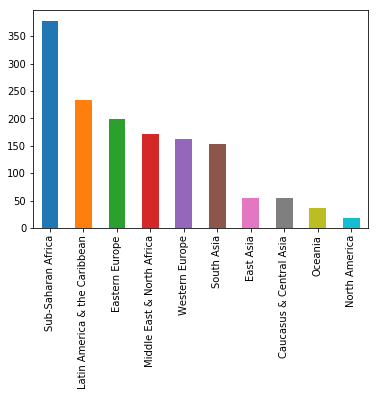

In [9]:
hfi.region.value_counts().plot(kind='bar') 
plt.xticks()

In [10]:
#hfi[''].value_counts().plot(kind='bar')

Diving into gender equality, let us understand observe the equality of parental rights between males and females in various regions around the world.  

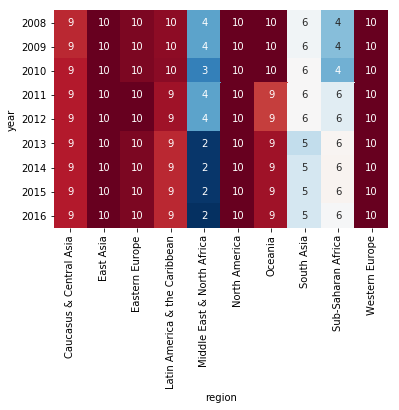

In [11]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_parental'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

According to the Human Freedom Report, "Parental rights refers to the extent to which women have equal rights based in law and custom regarding “legal guardianship of a child during a marriage and custody rights over a child after divorce.”"

That being said, we can divide the rights parental rights in regards to legal guardianship of a child during a marriiage as compared to after a divorce.  This heat map below shows that in most regions, females equal rights to guardianship of their children during marriage.  However, in regions such as the Middle East & North Africa, South Asia, and Sub Saharuan Africa, there represents more of an imbalance.

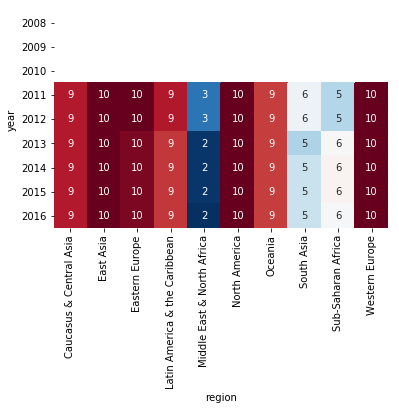

In [12]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_parental_marriage'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

The same analysis can also be done with parental rights after divorces.  The trend appears to be similar to that of parental rights during marriages, but what is most surprising is found in the Middle East & North Africa catagory.  The ranking drops from a 5 to a 2 between 2012 and 2013 indicating a setback with progression toward equality in this region.

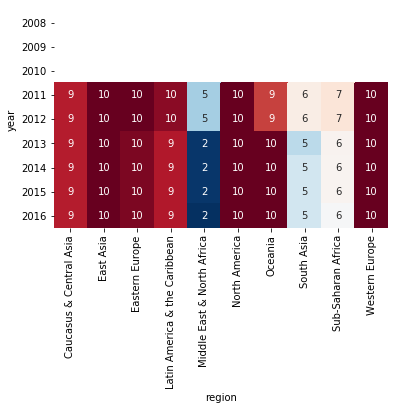

In [13]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_parental_divorce'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

Question: Which regions have the greatest amount of freedom in regards to same sex marriage?

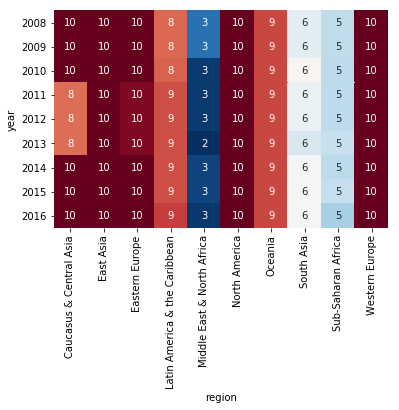

In [14]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_sex'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

From this heat map, we can see that the regions struggle with equality 

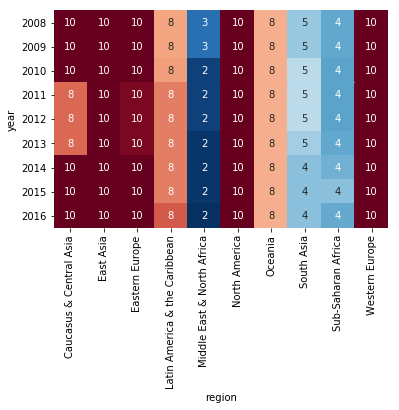

In [15]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_sex_male'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

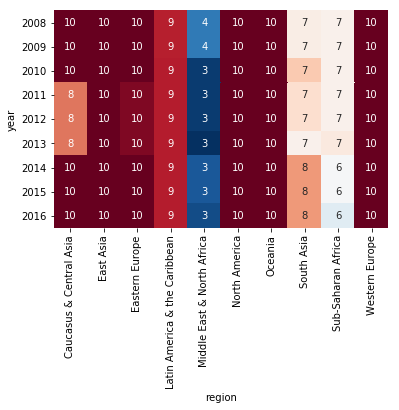

In [16]:
sns.heatmap(hfi.groupby(['year', 'region'])['pf_identity_sex_female'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

#### Merging Data

In [17]:
# read women purchasing power from https://ourworldindata.org/economic-inequality-by-gender
ge = pd.read_csv('https://tufts.box.com/shared/static/ikc9nsb0red47dv5ldc0rcsv5rml681l.csv')
ge.head()

Entity Code  Year  \
0  Afghanistan  AFG  1800   
1  Afghanistan  AFG  1820   
2  Afghanistan  AFG  1870   
3  Afghanistan  AFG  1913   
4  Afghanistan  AFG  1950   

   Women participating in major purchase decisions (% of women 15-49) (% of women age 15-49)  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           
3                                                NaN                                           
4                                                NaN                                           

   GDP per capita, PPP, int. $ (current international $)  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   Total population (Gapminder)  
0                     3280000.0  
1                     3280000.0  
2                     4207000.0  
3                     5730000.0  
4                     8151455.0

In [19]:
#ge.dtypes

In [33]:
mergesets = hfi.merge(ge, left_on='year', right_on='Year', suffixes=(False, False))
mergesets.head()

year ISO_code countries          region  pf_rol_procedural  pf_rol_civil  \
0  2016      ALB   Albania  Eastern Europe           6.661503      4.547244   
1  2016      ALB   Albania  Eastern Europe           6.661503      4.547244   
2  2016      ALB   Albania  Eastern Europe           6.661503      4.547244   
3  2016      ALB   Albania  Eastern Europe           6.661503      4.547244   
4  2016      ALB   Albania  Eastern Europe           6.661503      4.547244   

   pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  \
0         4.666508  5.291752        8.920429                        10.0   
1         4.666508  5.291752        8.920429                        10.0   
2         4.666508  5.291752        8.920429                        10.0   
3         4.666508  5.291752        8.920429                        10.0   
4         4.666508  5.291752        8.920429                        10.0   

               ...               ef_rank  hf_score  hf_rank  hf_quartile  \
0              ...                  34.0   7.56814     48.0          2.0   
1              ...                  34.0   7.56814     48.0          2.0   
2              ...                  34.0   7.56814     48.0          2.0   
3              ...                  34.0   7.56814     48.0          2.0   
4              ...                  34.0   7.56814     48.0          2.0   

                Entity  Code  Year  \
0          Afghanistan   AFG  2016   
1              Albania   ALB  2016   
2              Algeria   DZA  2016   
3               Angola   AGO  2016   
4  Antigua and Barbuda   ATG  2016   

   Women participating in major purchase decisions (% of women 15-49) (% of women age 15-49)  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           
3                                               80.9                                           
4                                                NaN                                           

   GDP per capita, PPP, int. $ (current international $)  \
0                                        1944.117005       
1                                       11559.300844       
2                                       15013.296380       
3                                        6440.990242       
4                                       22661.488536       

   Total population (Gapminder)  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  

[5 rows x 129 columns]

By merging these two datasets, we can also compare how women in various countries are given the opportunity to participate in purchase descision within their marriages.

In [ ]:
#pd.merge(a, b, on=['A', 'B'])